# Exploratory Data Analysis Pt.4

In [11]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Manipulation

In [4]:
# Set working directory
path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Data'
os.chdir(path)

# Read in data
df = pd.read_parquet("dtf_categorical_col.parquet")

# Slice data to only include time from 360 and below because this is the median or more frequent number of gambles among players.
dtf_2 = df[df['gambles'] <= 360]

In [5]:
# Create a list of unique 'timing' values
timing = dtf_2['timing'].unique()

# Count the number of players per leg
count = {}
for i in timing:
    leg = dtf_2[dtf_2['timing'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count[i] = leg

print(count)

# Create a list of unique players in leg 1
leg1 = dtf_2[dtf_2['timing'] == 'leg 1']
leg1 = leg1['playerkey'].unique()

# Create a list of unique players in leg 9
leg9 = dtf_2[dtf_2['timing'] == 'leg 9']
leg9 = leg9['playerkey'].unique()

# Identify how many players continue playing and how many stop playing
stop_playing = []
continue_playing = []
for i in leg1:
    if i in leg9:
        continue_playing.append(i)
    else:
        stop_playing.append(i)

# Which players stop playing
print('Players who stop playing', stop_playing)
print('Number of players who stop playing', len(stop_playing))

# Which players continue playing
print('Players who continue playing', continue_playing)
print('Number of players who continue playing', len(continue_playing))

{'leg 1': 83, 'leg 2': 83, 'leg 3': 74, 'leg 4': 69, 'leg 5': 66, 'leg 6': 61, 'leg 7': 56, 'leg 8': 50, 'leg 9': 46}
Players who stop playing [3, 7, 10, 11, 21, 22, 25, 27, 30, 35, 37, 39, 41, 42, 47, 49, 51, 52, 53, 56, 57, 65, 68, 70, 71, 74, 75, 77, 78, 80, 81, 82, 83, 84, 85, 88, 96]
Number of players who stop playing 37
Players who continue playing [2, 4, 6, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 23, 29, 33, 36, 38, 40, 43, 44, 46, 48, 54, 61, 62, 63, 66, 69, 72, 73, 76, 79, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100]
Number of players who continue playing 46


In [7]:
# Create a df with only players who stop playing
dtf_stop = dtf_2[dtf_2['playerkey'].isin(stop_playing)]

# Create a df with only players who continue playing
dtf_continue = dtf_2[dtf_2['playerkey'].isin(continue_playing)]

# Create a df with only leg 1 and leg 2
dtf_stop_leg1_2 = dtf_stop[dtf_stop['timing'].isin(['leg 1', 'leg 2'])]

# Create a df with only leg 1 and leg 2
dtf_continue_leg1_2 = dtf_continue[dtf_continue['timing'].isin(['leg 1', 'leg 2'])]

# Data Analysis

## People who Stop Playing

In [9]:
# Calcualte mean losses of dtf_stop_leg1_2
mean_loss = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'loss']['percent_return'].mean(), 2)
# Count how many losses of dtf_stop_leg1_2
count_loss = dtf_stop_leg1_2['result_type'].value_counts()['loss']
# Print mean loss and count of losses
print('Mean loss:', mean_loss)
print('Count of losses:', count_loss)
print('--------------------------------------------')

# Calculate mean near-hit of dtf_stop_leg1_2
mean_near_hit = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'near-hit']['percent_return'].mean(), 2)
# Count how many near-hits of dtf_stop_leg1_2
count_near_hit = dtf_stop_leg1_2['result_type'].value_counts()['near-hit']
# Print mean near-hit and count of near-hits
print('Mean near-hit:', mean_near_hit)
print('Count of near-hits:', count_near_hit)
print('--------------------------------------------')

# Calculate mean gain of dtf_stop_leg1_2
mean_gain = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'gain']['percent_return'].mean(), 2)
# Count how many gains of dtf_stop_leg1_2
count_gain = dtf_stop_leg1_2['result_type'].value_counts()['gain']
# Print mean gain and count of gains
print('Mean gain:', mean_gain)
print('Count of gains:', count_gain)
print('--------------------------------------------')

Mean loss: -100.0
Count of losses: 1637
--------------------------------------------
Mean near-hit: -61.83
Count of near-hits: 669
--------------------------------------------
Mean gain: 351.95
Count of gains: 406
--------------------------------------------


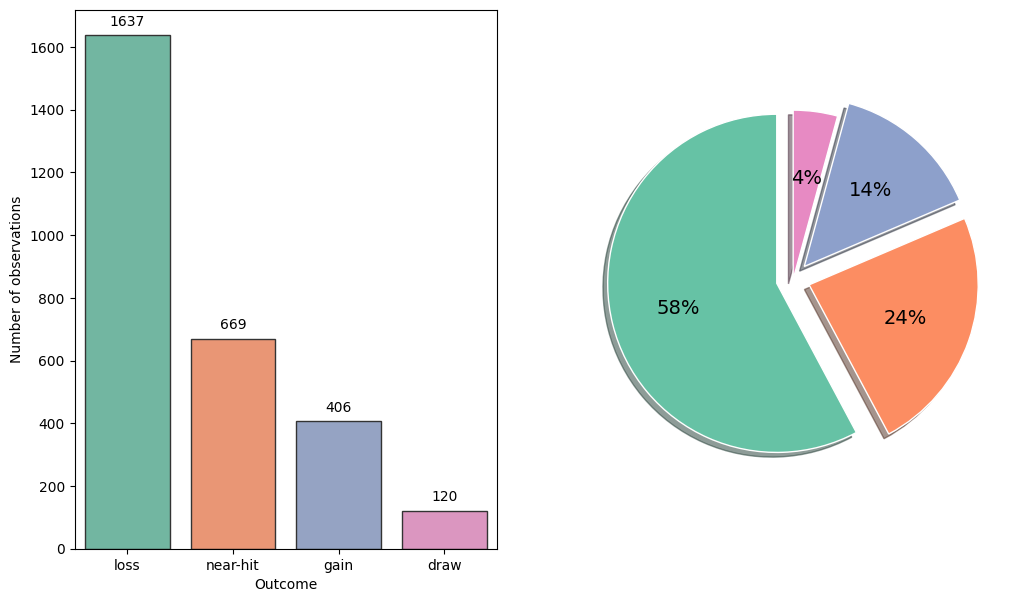

In [12]:
# Set palette for all plots
sns.set_palette("Set2")
# Create figure 1  barplot of the number of losses, near-hits, gains, and draws
fig1, axes1 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=dtf_stop_leg1_2, order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes1[0])
axes1[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes1[0].patches:
    axes1[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes1[1]
axes1[1].pie(dtf_stop_leg1_2['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})


# Make figure 1 bigger
fig1.set_size_inches(12, 7)